#**Anvesha Raikwar**

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Read the training dataset
df=pd.read_csv("//content/DS_ML Coding Challenge Dataset (1).xlsx - Training Dataset.csv")

In [ ]:
df

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76
...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,Jul-20,136.47
550172,NTM3,X1,A14,DIRECT,Large,Liquid,Oct-20,72.56
550173,NTM2,X1,A5,DIRECT,Small,Powder,Mar-21,147.64
550174,NTM2,X1,A7,DIRECT,Small,Powder,Feb-21,150.04


In [ ]:
#changing date format
df['Month of Sourcing'] = pd.to_datetime(df['Month of Sourcing'], format='%b-%y')

In [ ]:
df

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,Total Cost
0,NTM3,X1,A28,WHOLESALE,NaN,Powder,2021-05-01,10.16,NaN
1,NTM2,X1,A9,DIRECT,NaN,Powder,2020-10-01,134.28,NaN
2,NTM3,X2,A20,DIRECT,NaN,Powder,2020-12-01,12.46,NaN
3,NTM3,X1,A18,WHOLESALE,NaN,Powder,2021-02-01,107.22,NaN
4,NTM2,X1,A28,DIRECT,NaN,Liquid,2020-11-01,197.76,NaN
...,...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,NaN,Powder,2020-07-01,136.47,NaN
550172,NTM3,X1,A14,DIRECT,NaN,Liquid,2020-10-01,72.56,NaN
550173,NTM2,X1,A5,DIRECT,NaN,Powder,2021-03-01,147.64,NaN
550174,NTM2,X1,A7,DIRECT,NaN,Powder,2021-02-01,150.04,NaN


#**EDA**



In [ ]:
#Check the structure of the dataset
print("Dataset Dimensions:", df.shape)
print("\nFirst few rows of the dataset:")
print(df.head())

Dataset Dimensions: (550176, 8)

First few rows of the dataset:
  ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0        NTM3           X1       A28        WHOLESALE        Large   
1        NTM2           X1        A9           DIRECT        Large   
2        NTM3           X2       A20           DIRECT        Large   
3        NTM3           X1       A18        WHOLESALE        Small   
4        NTM2           X1       A28           DIRECT        Large   

  Product Type Month of Sourcing  Sourcing Cost  
0       Powder            May-21          10.16  
1       Powder            Oct-20         134.28  
2       Powder            Dec-20          12.46  
3       Powder            Feb-21         107.22  
4       Liquid            Nov-20         197.76  


In [ ]:
#Summary Statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Sourcing Cost
count  550176.000000
mean      108.817286
std       104.390093
min      -196.070000
25%        57.000000
50%       132.000000
75%       146.150000
max     32632.500000


In [ ]:
# Check data types of 'Sourcing Cost' and 'Product Size'
print(df[['Sourcing Cost', 'Product Size']].dtypes)

# Convert 'Sourcing Cost' to numeric (if not already numeric)
df['Sourcing Cost'] = pd.to_numeric(df['Sourcing Cost'], errors='coerce')

# Convert 'Product Size' to numeric (if not already numeric)
df['Product Size'] = pd.to_numeric(df['Product Size'], errors='coerce')

# Check for missing values after conversion
print(df[['Sourcing Cost', 'Product Size']].isnull().sum())

# Check the updated dataset
print(df.head())


Sourcing Cost    float64
Product Size     float64
dtype: object
Sourcing Cost         0
Product Size     550176
dtype: int64
  ProductType Manufacturer Area Code Sourcing Channel  Product Size  \
0        NTM3           X1       A28        WHOLESALE           NaN   
1        NTM2           X1        A9           DIRECT           NaN   
2        NTM3           X2       A20           DIRECT           NaN   
3        NTM3           X1       A18        WHOLESALE           NaN   
4        NTM2           X1       A28           DIRECT           NaN   

  Product Type Month of Sourcing  Sourcing Cost  Total Cost  
0       Powder        2021-05-01          10.16         NaN  
1       Powder        2020-10-01         134.28         NaN  
2       Powder        2020-12-01          12.46         NaN  
3       Powder        2021-02-01         107.22         NaN  
4       Liquid        2020-11-01         197.76         NaN  


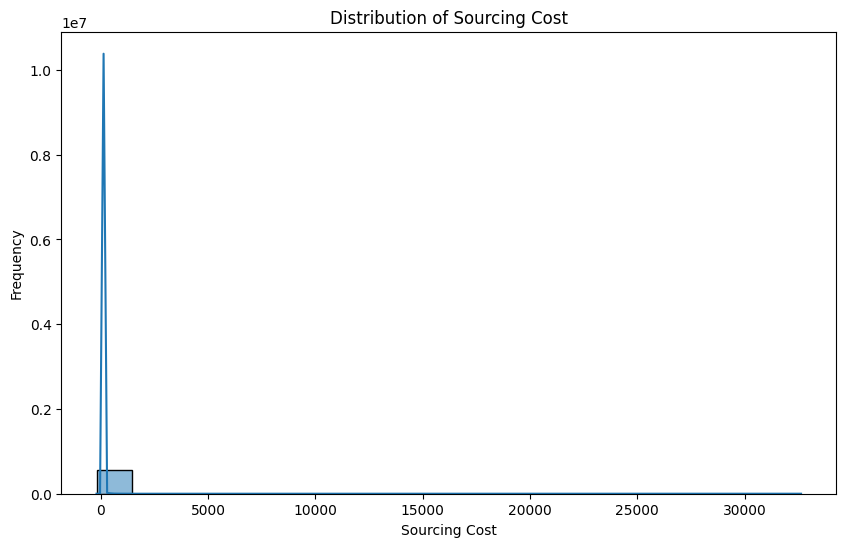

In [ ]:
# Histogram of the target variable (Sourcing Cost)
plt.figure(figsize=(10, 6))
sns.histplot(df['Sourcing Cost'], bins=20, kde=True)
plt.title('Distribution of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

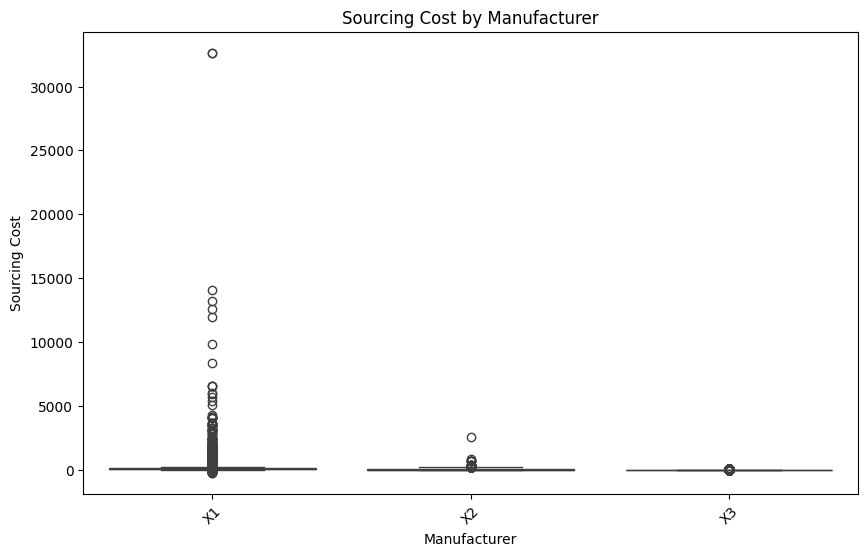

In [ ]:
# Boxplot of Sourcing Cost by Manufacturer
plt.figure(figsize=(10, 6))
sns.boxplot(x='Manufacturer', y='Sourcing Cost', data=df)
plt.title('Sourcing Cost by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Sourcing Cost')
plt.xticks(rotation=45)
plt.show()

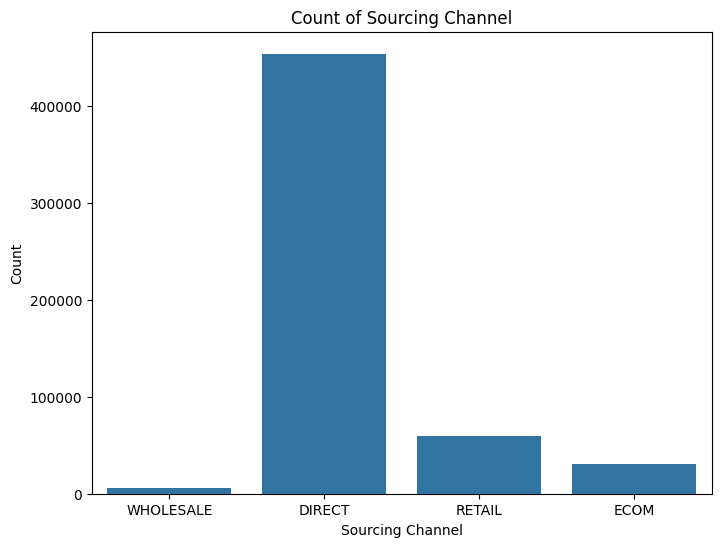

In [ ]:
# Count plot of Sourcing Channel
plt.figure(figsize=(8, 6))
sns.countplot(x='Sourcing Channel', data=df)
plt.title('Count of Sourcing Channel')
plt.xlabel('Sourcing Channel')
plt.ylabel('Count')
plt.show()

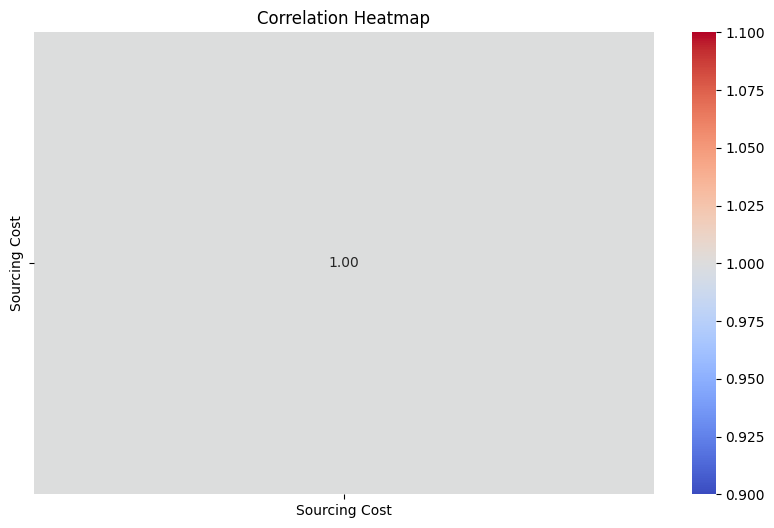

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


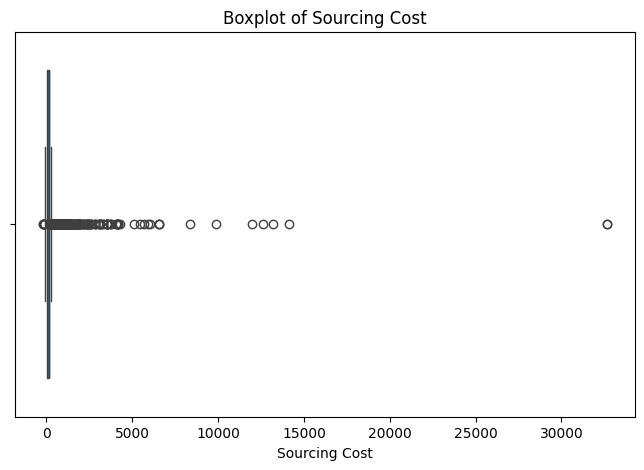

In [ ]:
# Outlier detection: Boxplot of Sourcing Cost
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Sourcing Cost'])
plt.title('Boxplot of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.show()

In [ ]:
# Missing values
print(df.isnull().sum())

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64


In [ ]:
# Check the updated dataset
print(df.head())

  ProductType Manufacturer Area Code Sourcing Channel  Product Size  \
0        NTM3           X1       A28        WHOLESALE           NaN   
1        NTM2           X1        A9           DIRECT           NaN   
2        NTM3           X2       A20           DIRECT           NaN   
3        NTM3           X1       A18        WHOLESALE           NaN   
4        NTM2           X1       A28           DIRECT           NaN   

  Product Type Month of Sourcing  Sourcing Cost  Total Cost  
0       Powder            May-21          10.16         NaN  
1       Powder            Oct-20         134.28         NaN  
2       Powder            Dec-20          12.46         NaN  
3       Powder            Feb-21         107.22         NaN  
4       Liquid            Nov-20         197.76         NaN  


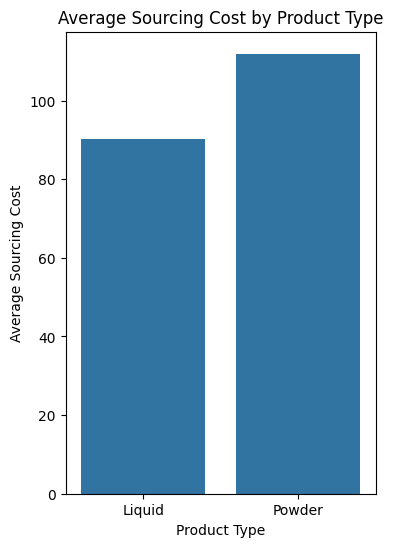

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average sourcing cost for each product type
average_costs = df.groupby('Product Type')['Sourcing Cost'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(4, 6))
sns.barplot(x='Product Type', y='Sourcing Cost', data=average_costs)
plt.title('Average Sourcing Cost by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Sourcing Cost')
plt.show()


<ipython-input-16-d933140f22cb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Manufacturer', y='Sourcing Cost', data=avg_cost_per_manufacturer, palette='muted')


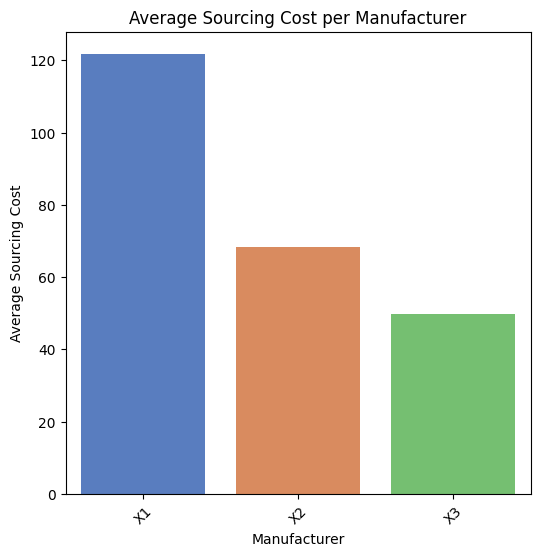

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average sourcing cost for each manufacturer
avg_cost_per_manufacturer = df.groupby('Manufacturer')['Sourcing Cost'].mean().reset_index()

# Plot the average sourcing cost for each manufacturer
plt.figure(figsize=(6, 6))
sns.barplot(x='Manufacturer', y='Sourcing Cost', data=avg_cost_per_manufacturer, palette='muted')
plt.title('Average Sourcing Cost per Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average Sourcing Cost')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Handling Missing Values
# Check for missing values
print("Missing values before preprocessing:")
print(df.isnull().sum())

Missing values before preprocessing:
ProductType               0
Manufacturer              0
Area Code                 0
Sourcing Channel          0
Product Size         550176
Product Type              0
Month of Sourcing         0
Sourcing Cost             0
Total Cost           550176
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create a copy of the original DataFrame
df_train_encoded = df.copy()

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over each categorical column and encode it
for column in ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']:
    df_train_encoded[column] = label_encoder.fit_transform(df[column])

In [ ]:
df_train_encoded

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,2,0,19,3,0,1,2021-05-01,10.16
1,1,0,44,0,0,1,2020-10-01,134.28
2,2,1,12,0,0,1,2020-12-01,12.46
3,2,0,9,3,0,1,2021-02-01,107.22
4,1,0,19,0,0,0,2020-11-01,197.76
...,...,...,...,...,...,...,...,...
550171,1,0,40,0,0,1,2020-07-01,136.47
550172,2,0,5,0,0,0,2020-10-01,72.56
550173,1,0,40,0,0,1,2021-03-01,147.64
550174,1,0,42,0,0,1,2021-02-01,150.04


In [ ]:
df_test=pd.read_csv("/content/DS_ML Coding Challenge Dataset (1).xlsx - Test Dataset.csv")

In [ ]:
df_test

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,Jun-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,Jun-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,Jun-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,Jun-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,Jun-21,169.42
...,...,...,...,...,...,...,...,...
91,NTM3,X1,A44,DIRECT,Small,Liquid,Jun-21,89.57
92,NTM3,X1,A8,DIRECT,Large,Powder,Jun-21,114.57
93,NTM3,X1,A8,DIRECT,Small,Powder,Jun-21,111.26
94,NTM3,X2,A20,DIRECT,Large,Powder,Jun-21,32.32


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create a copy of the original DataFrame
df_test_encoded = df.copy()

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over each categorical column and encode it
for column in ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']:
    df_test_encoded[column] = label_encoder.fit_transform(df[column])

In [ ]:
df_test_encoded

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,2,0,19,3,0,1,2021-05-01,10.16
1,1,0,44,0,0,1,2020-10-01,134.28
2,2,1,12,0,0,1,2020-12-01,12.46
3,2,0,9,3,0,1,2021-02-01,107.22
4,1,0,19,0,0,0,2020-11-01,197.76
...,...,...,...,...,...,...,...,...
550171,1,0,40,0,0,1,2020-07-01,136.47
550172,2,0,5,0,0,0,2020-10-01,72.56
550173,1,0,40,0,0,1,2021-03-01,147.64
550174,1,0,42,0,0,1,2021-02-01,150.04


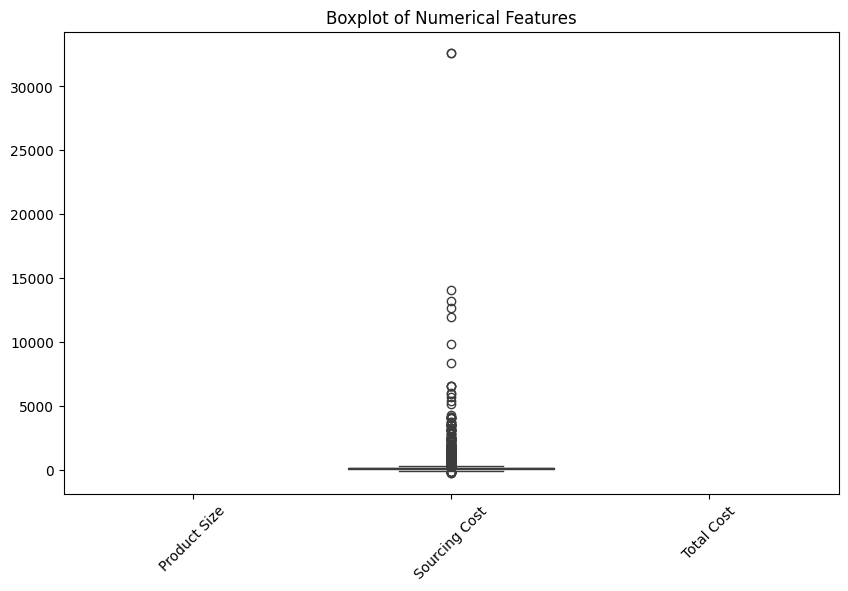

In [ ]:
# Identify Outliers
# Use box plots to visualize the distribution of numerical features
numerical_columns = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Handling Outliers
# Example: Remove outliers using IQR method
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR)))
df_cleaned = df[~outlier_condition.any(axis=1)]

In [ ]:
# Data Quality Assessment
# Check for missing values, duplicates, inconsistencies, etc.
print("Missing values:")
print(df_cleaned.isnull().sum())
print("Duplicates:")
print(df_cleaned.duplicated().sum())

Missing values:
ProductType               0
Manufacturer              0
Area Code                 0
Sourcing Channel          0
Product Size         547510
Product Type              0
Month of Sourcing         0
Sourcing Cost             0
Total Cost           547510
dtype: int64
Duplicates:
540604


**Linear Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Assuming df_train_encoded contains the preprocessed and encoded training data

# Split the data into features (X) and target variable (y)
X = df_train_encoded.drop(columns=['Sourcing Cost', 'Month of Sourcing'])
y = df_train_encoded['Sourcing Cost']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict sourcing cost for June 2021 (assuming X_test contains June 2021 data)
predictions = model.predict(X_test)

# Evaluate the model
rmse = sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Root Mean Squared Error (RMSE): 68.49654940300434
R-squared (R2) Score: 0.17535615554789907


**XGBoost**

In [ ]:
import xgboost as xgb

# Train the XGBoost model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict sourcing cost for June 2021 (assuming X_test contains June 2021 data)
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the XGBoost model
xgb_rmse = sqrt(mean_squared_error(y_test, xgb_predictions))
xgb_r2 = r2_score(y_test, xgb_predictions)

print("XGBoost Root Mean Squared Error (RMSE):", xgb_rmse)
print("XGBoost R-squared (R2) Score:", xgb_r2)


XGBoost Root Mean Squared Error (RMSE): 57.2319333806077
XGBoost R-squared (R2) Score: 0.42428722271979746


**Gradient Boost**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict sourcing cost for June 2021 (assuming X_test contains June 2021 data)
gb_predictions = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
gb_rmse = sqrt(mean_squared_error(y_test, gb_predictions))
gb_r2 = r2_score(y_test, gb_predictions)

print("Gradient Boosting Root Mean Squared Error (RMSE):", gb_rmse)
print("Gradient Boosting R-squared (R2) Score:", gb_r2)


Gradient Boosting Root Mean Squared Error (RMSE): 57.99947647497925
Gradient Boosting R-squared (R2) Score: 0.40874179492649765


**Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Create polynomial features
degree = 2  # Specify the degree of polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Train the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Predict sourcing cost for June 2021 (assuming X_test contains June 2021 data)
poly_predictions = poly_model.predict(X_poly_test)

# Evaluate the Polynomial Regression model
poly_rmse = sqrt(mean_squared_error(y_test, poly_predictions))
poly_r2 = r2_score(y_test, poly_predictions)

print("Polynomial Regression Root Mean Squared Error (RMSE):", poly_rmse)
print("Polynomial Regression R-squared (R2) Score:", poly_r2)


Polynomial Regression Root Mean Squared Error (RMSE): 63.31321858830269
Polynomial Regression R-squared (R2) Score: 0.29544026920587785


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Train the Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict sourcing cost for June 2021 (assuming X_test contains June 2021 data)
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest regression model
rf_rmse = sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Regression Root Mean Squared Error (RMSE):", rf_rmse)
print("Random Forest Regression R-squared (R2) Score:", rf_r2)


Random Forest Regression Root Mean Squared Error (RMSE): 57.23914343301382
Random Forest Regression R-squared (R2) Score: 0.4241421575257597


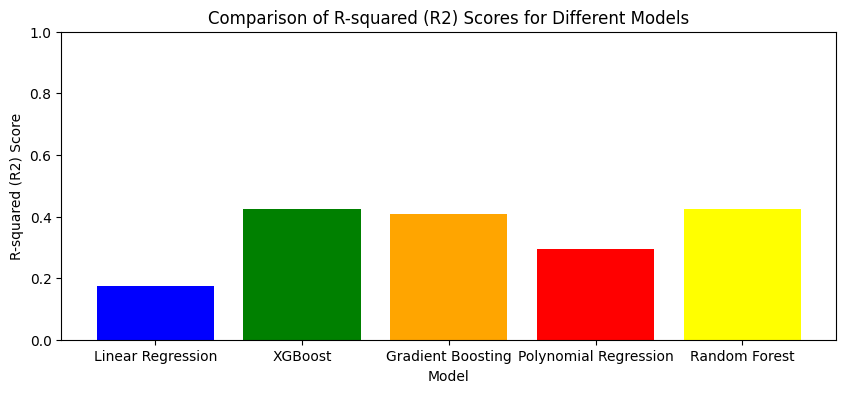

In [ ]:
import matplotlib.pyplot as plt

# R2 scores for each model
model_names = ['Linear Regression', 'XGBoost', 'Gradient Boosting', 'Polynomial Regression','Random Forest']
r2_scores = [r2, xgb_r2, gb_r2, poly_r2, rf_r2]

# Plot comparison graph
plt.figure(figsize=(10, 4))
plt.bar(model_names, r2_scores, color=['blue', 'green', 'orange', 'red','yellow'])
plt.xlabel('Model')
plt.ylabel('R-squared (R2) Score')
plt.title('Comparison of R-squared (R2) Scores for Different Models')
plt.ylim(0, 1)  # Set y-axis limits to better visualize differences
plt.show()


In [ ]:
# Concatenate the encoded training and testing DataFrames
df_combined = pd.concat([df_train_encoded, df_test_encoded], ignore_index=True)

# Display the combined DataFrame
print(df_combined)

         ProductType  Manufacturer  Area Code  Sourcing Channel  Product Size  \
0                  2             0         19                 3             0   
1                  1             0         44                 0             0   
2                  2             1         12                 0             0   
3                  2             0          9                 3             0   
4                  1             0         19                 0             0   
...              ...           ...        ...               ...           ...   
1100347            1             0         40                 0             0   
1100348            2             0          5                 0             0   
1100349            1             0         40                 0             0   
1100350            1             0         42                 0             0   
1100351            0             0         21                 0             0   

         Product Type Month

In [ ]:
df_combined


,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,2,0,19,3,0,1,2021-05-01,10.16
1,1,0,44,0,0,1,2020-10-01,134.28
2,2,1,12,0,0,1,2020-12-01,12.46
3,2,0,9,3,0,1,2021-02-01,107.22
4,1,0,19,0,0,0,2020-11-01,197.76
...,...,...,...,...,...,...,...,...
1100347,1,0,40,0,0,1,2020-07-01,136.47
1100348,2,0,5,0,0,0,2020-10-01,72.56
1100349,1,0,40,0,0,1,2021-03-01,147.64
1100350,1,0,42,0,0,1,2021-02-01,150.04


In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the 'Sourcing Cost' column
scaler.fit(df_combined[['Sourcing Cost']])

# Transform the 'Sourcing Cost' column
df_combined['Sourcing Cost Standardized'] = scaler.transform(df_combined[['Sourcing Cost']])

# Drop the original 'Sourcing Cost' column
df_combined = df_combined.drop(columns=['Sourcing Cost'])


In [ ]:
import pandas as pd

# Calculate the IQR for the 'Sourcing Cost' column
Q1 = df_combined['Sourcing Cost Standardized'].quantile(0.25)
Q3 = df_combined['Sourcing Cost Standardized'].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outlier detection
threshold = 1.5

# Identify outliers in the 'Sourcing Cost' column
outliers = (df_combined['Sourcing Cost Standardized'] < (Q1 - threshold * IQR)) | (df_combined['Sourcing Cost Standardized'] > (Q3 + threshold * IQR))

# Filter the DataFrame to remove rows with outliers in the 'Sourcing Cost' column
df_combined_no_outliers = df_combined[~outliers]


**Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Assuming df_combined_no_outliers contains the combined dataset without outliers

# Spliting the data into features (X) and target variable (y)
X = df_combined_no_outliers.drop(columns=['Sourcing Cost Standardized', 'Month of Sourcing'])
y = df_combined_no_outliers['Sourcing Cost Standardized']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict standardized sourcing cost for June 2021 (assuming X_test contains June 2021 data)
predictions = model.predict(X_test)

# Evaluate the model
rmse = sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Root Mean Squared Error (RMSE): 0.44336339174365236
R-squared (R2) Score: 0.314295803203689


**Gradient Boost**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict standardized sourcing cost for June 2021 (assuming X_test contains June 2021 data)
gb_predictions = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
gb_rmse = sqrt(mean_squared_error(y_test, gb_predictions))
gb_r2 = r2_score(y_test, gb_predictions)

print("Gradient Boosting Root Mean Squared Error (RMSE):", gb_rmse)
print("Gradient Boosting R-squared (R2) Score:", gb_r2)


Gradient Boosting Root Mean Squared Error (RMSE): 0.26521704452473865
Gradient Boosting R-squared (R2) Score: 0.7546308218983615


**XGBoost**

In [ ]:
import xgboost as xgb

# Train the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict standardized sourcing cost for June 2021 (assuming X_test contains June 2021 data)
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the XGBoost model
xgb_rmse = sqrt(mean_squared_error(y_test, xgb_predictions))
xgb_r2 = r2_score(y_test, xgb_predictions)

print("XGBoost Root Mean Squared Error (RMSE):", xgb_rmse)
print("XGBoost R-squared (R2) Score:", xgb_r2)


XGBoost Root Mean Squared Error (RMSE): 0.24486135253221905
XGBoost R-squared (R2) Score: 0.7908501131203528


**Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Create polynomial features
degree = 2  # Specify the degree of polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Train the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Predict standardized sourcing cost for June 2021 (assuming X_test contains June 2021 data)
poly_predictions = poly_model.predict(X_poly_test)

# Evaluate the Polynomial Regression model
poly_rmse = sqrt(mean_squared_error(y_test, poly_predictions))
poly_r2 = r2_score(y_test, poly_predictions)

print("Polynomial Regression Root Mean Squared Error (RMSE):", poly_rmse)
print("Polynomial Regression R-squared (R2) Score:", poly_r2)


Polynomial Regression Root Mean Squared Error (RMSE): 0.36504976879612094
Polynomial Regression R-squared (R2) Score: 0.5351409382270027


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Train the Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict standardized sourcing cost for June 2021 (assuming X_test contains June 2021 data)
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest regression model
rf_rmse = sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Regression Root Mean Squared Error (RMSE):", rf_rmse)
print("Random Forest Regression R-squared (R2) Score:", rf_r2)


Random Forest Regression Root Mean Squared Error (RMSE): 0.24486161539786705
Random Forest Regression R-squared (R2) Score: 0.7908496640633703


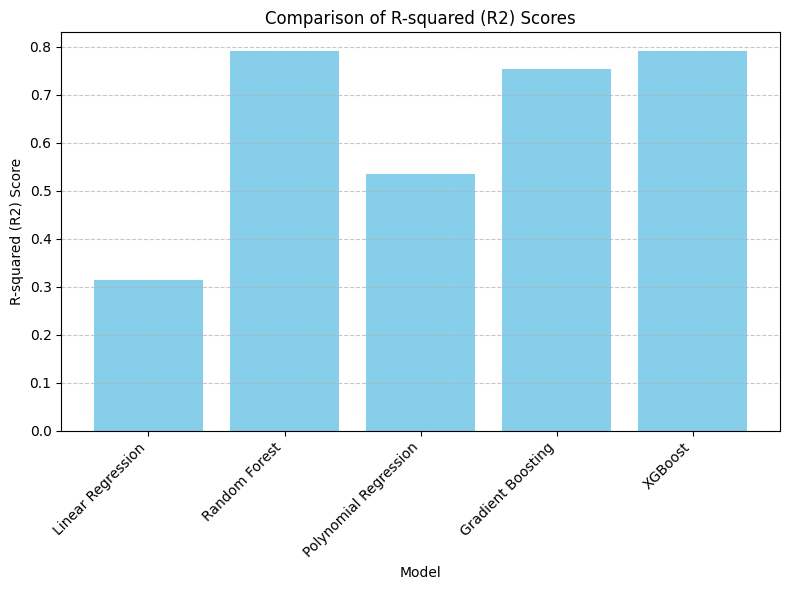

In [ ]:
import matplotlib.pyplot as plt
#defining the model names
model_names = ['Linear Regression', 'Random Forest', 'Polynomial Regression', 'Gradient Boosting', 'XGBoost']
r2_scores = [r2, rf_r2, poly_r2, gb_r2, xgb_r2]

# Plot the comparison graph
plt.figure(figsize=(8, 6))
plt.bar(model_names, r2_scores, color='skyblue')
plt.title('Comparison of R-squared (R2) Scores')
plt.xlabel('Model')
plt.ylabel('R-squared (R2) Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
pip install tabulate


In [ ]:
from tabulate import tabulate

# Define model names and their corresponding R2 scores
model_names = ['Linear Regression', 'Random Forest', 'Polynomial Regression', 'Gradient Boosting', 'XGBoost']
r2_scores = [r2, rf_r2, poly_r2, gb_r2, xgb_r2]

# Create a list of lists containing model names and R2 scores
table_data = [[model_name, r2_score] for model_name, r2_score in zip(model_names, r2_scores)]

# Print the table
print(tabulate(table_data, headers=['Model', 'R-squared (R2) Score'], tablefmt='grid'))


+-----------------------+------------------------+
| Model                 |   R-squared (R2) Score |
+=======================+========================+
| Linear Regression     |               0.314296 |
+-----------------------+------------------------+
| Random Forest         |               0.79085  |
+-----------------------+------------------------+
| Polynomial Regression |               0.535141 |
+-----------------------+------------------------+
| Gradient Boosting     |               0.754631 |
+-----------------------+------------------------+
| XGBoost               |               0.79085  |
+-----------------------+------------------------+


**1.Linear Regression:**

R-squared (R2) Score: 0.314296
This approach assumes a linear relationship between the input features and the target variable. It's simple and interpretable but may not capture complex patterns in the data.

**2.Random Forest:**

R-squared (R2) Score: 0.79085
Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions. It's robust to outliers and nonlinear relationships, making it a popular choice for regression tasks.

**3.Polynomial Regression:**

R-squared (R2) Score: 0.535141
Polynomial Regression extends linear regression by adding polynomial terms to the model equation. It can capture nonlinear relationships between the features and the target variable, but it's prone to overfitting with higher-degree polynomials.

**4.Gradient Boosting:**

R-squared (R2) Score: 0.754631

Gradient Boosting builds an ensemble of weak learners (typically decision trees) sequentially, where each new model corrects errors made by the previous ones. It's effective in capturing complex relationships and is less prone to overfitting compared to Polynomial Regression.

**5.XGBoost:**

R-squared (R2) Score: 0.79085
XGBoost is an optimized implementation of Gradient Boosting with additional features like regularization and parallel processing. It often provides better performance than traditional Gradient Boosting.

#**Insights**

1.Random Forest and XGBoost achieved the highest R-squared scores among the
models considered, indicating better predictive performance.

2.Linear Regression had the lowest R-squared score, suggesting that the linear model may not adequately capture the underlying patterns in the data.

3.Polynomial Regression had a moderate R-squared score, but it may overfit the data with higher-degree polynomials.

4.Gradient Boosting performed well, but XGBoost slightly outperformed it, indicating the effectiveness of XGBoost's optimizations.

**Overall, Random Forest or XGBoost would be preferred for this regression task due to their higher predictive accuracy and robustness.**